## Analyze A/B Test Results



- Prepared By : Amr Ibrahim (amr.ibrahim2011@gmail.com)
- Advanced Data Analysis Track- Future World is Digital (FWD) Scholarship.
- Jan-2021

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)
- [Resources](#resources)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [58]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, Reading in the `ab_data.csv` data. Store it in `df`.  

a. Read in the dataset and take a look at the top few rows here:

In [59]:
# reading the data file
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [61]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [62]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [63]:
df['converted'].mean()

0.11965919355605512

In [64]:
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


e. The number of times the `new_page` and `treatment` don't line up.

In [65]:
# to have consistenent testing results, new_page should be matched with treatment, so to answer this question, we will look up 
# into two thins, 
# (1) raws that have the landing page is new_page but the group is not treatmnet.
# (2) raws that have the landing page is not new_page (old_page) but the droup is the treatment.

new_page_not_treatment = df[(df['landing_page']== 'new_page') & (df['group'] != 'treatment')]

old_page_treatment = df[(df['landing_page']== 'old_page') & (df['group'] == 'treatment')]

notmatching = new_page_not_treatment + old_page_treatment
notmatching.shape[0]

3893

f. Do any of the rows have missing values?

In [66]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [67]:
# removing the non matching landing page and treatment as these data will be misleading
df2 = df.drop(notmatching.index)

In [68]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


a. How many unique **user_id**s are in **df2**?

In [70]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [71]:
df2['user_id'][df2['user_id'].duplicated(keep =False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [72]:
df2[df2['user_id'].duplicated(keep =False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [73]:
# we can drop the duplicate value using the unique time stamp
duplicate = df2[df2['timestamp'] == '2017-01-14 02:55:59.590927' ]

#dropping the duplicate varuable 
df2 = df2.drop(duplicate.index)

In [74]:
# verifying the dropping is done correctly
df2.shape[0] # the shape is matching the unique user id.

290584

In [75]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [76]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [77]:
p_control =  df2[df2['group']=='control']['converted'].mean()
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [78]:
p_treatment = df2[df2['group']=='treatment']['converted'].mean()
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [79]:
(df2[df2['landing_page']=='new_page'].shape[0])/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

#### My Answer for this question will be summarized on the following observations:
- The probability of the individuals to land on the new page is 0.5 so there is equal chances for both pages for landing.
- The conversion rate for the old page and new page is very close and there is a tiny advantage for the old page considering the conversion rate for old page is 0.1203 and for new page is 0.1188.
- Throguh these observations we don't have sufficient evidence that the new page treatment leads to more conversions and if we had to take a quick judgement -which will be not accurate- we can say the old page is better and leads to more conversions. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

- Null Hypothesis: The probability of old page is equal to or greater than the probability of the new page.

- Alternative Hypothesis: The probability of new page being better (greater than) the probability of old page. 

    - **$H_{o}$** :  **$p_{new}$** - **$p_{old}$** <= 0
    - **$H_{1}$** :  **$p_{new}$** - **$p_{old}$** >  0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [80]:
# As per assumption above, the Pnew equal the converted rate at our dataframe df2
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [81]:
# Also the assumption is that P_old equal to p_new
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [82]:
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [83]:
n_old = df2.query('group == "control"').shape[0]
n_old

145274

In [84]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [85]:
new_page_converted= np.random.choice([0,1], size = n_new , p= [(1-p_new), p_new])
new_page_converted.mean()

0.12011561489229922

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [86]:
old_page_converted= np.random.choice([0,1], size = n_old , p= [(1-p_old), p_old])
old_page_converted.mean()



0.12086815259440781

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [87]:
obs_diff = (new_page_converted.mean()) - (old_page_converted.mean())
obs_diff

-0.0007525377021085911

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [88]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[(1-p_new),p_new])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[(1-p_old),p_old])
    mean_diffs = (new_page_converted.mean()) - (old_page_converted.mean())
    p_diffs.append(mean_diffs)   

In [89]:
# converting the p_diffs list into p_diffs array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

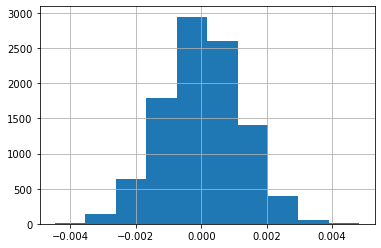

In [90]:
# Plotting the Histogram
plt.hist(p_diffs);
plt.grid()


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [91]:
# Recalling the pre-calculated conversion mean of control and treatmnet groups
p_control , p_treatment

(0.1203863045004612, 0.11880806551510564)

In [92]:
actual_diff =  p_treatment - p_control
actual_diff

-0.0015782389853555567

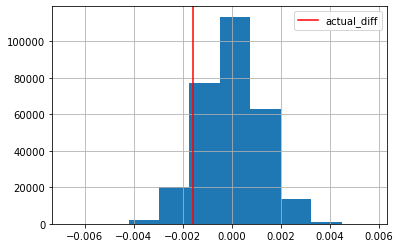

In [93]:
# In this part we will compute the p-value
null_vals = np.random.normal(0, p_diffs.std(), size = df2.shape[0])

# 
plt.hist(null_vals);
plt.grid()
plt.axvline(x=actual_diff , color = 'red', label = 'actual_diff');
plt.legend();


In [94]:
# computing the p-value
p_value = (null_vals > actual_diff).mean()
p_value

0.9037352366269306

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**What we have computed in part (J) is the so-called P-Value, and the definition of the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct**

**Based ont he obtained p-value which is 0.903 and this value is far greater than the typical $\alpha$ level of 0.05 in business studies, so we can for certain fail to reject the null hypothesis and the result of our study is that the old page is resulting better conversion rate than the new one and the technical advice for the e-commerce company to keep using the old landing page for their users**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [121]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
n_old = df2[df2.group == 'control'].converted.count()
n_new = df2[df2.group == 'treatment'].converted.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [122]:
# based upon the documentation
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- **A z-score represents how many standard deviations away our data point is from the mean**
- **A positive z-score suggests that our data point is on the right side of the mean line on the bell curve.**
- **p-value of 0.9050 is very close to the p-value we computed earlier in part j.**
- **With this computation, we can confidently say we fail to reject null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**This is a case of Logistic Regression. As we are studing the conversion rate of the two pages and this conversion rate has only two outcomes, so the logistic regression will be the suitable one to be used.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [133]:
# Adding intercept 
df2['intercept']  = 1

# Adding the dummies variables for the landing page and group columns using the pd.get_dummies()
df2 [['landing_page_new', 'landing_page_old']] = pd.get_dummies(df2['landing_page'])
df2[['ab_page_control', 'ab_page_treatment']] = pd.get_dummies(df2['group'])
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,landing_page_new,landing_page_old,ab_page_control,ab_page_treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1


In [134]:
# I will use the landing_page_old and ab_page_control as the baselines, so these two columns should be removed
df2.drop(['landing_page_old', 'ab_page_control'] , axis = 1, inplace = True)

#Checking the dataframe
df2.head(3)


,user_id,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [135]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page_treatment']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [136]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 09 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        15:11:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page_treatment    -0.0150      0.011     -1.311      0.190      -0.037       0.007
=====================================================================================
"""

In [137]:
np.exp(results.params)

intercept            0.136863
ab_page_treatment    0.985123
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The Answer**

As Proven by **Part II** of this project that the p-value was 0.9 which lead us that we fail reject the null, the null hypothesis at part II was that **$H_{o}$** :  **$p_{new}$** - **$p_{old}$** <= 0 and so the final result was the new page conversion was equal or less than the old page conversion.

The Null and the Alternative hypotheses regarding this logistic regression model are as follows:
- $H_0: p_{new} = p_{old}$$

- $H_1: p_{new} \neq p_{old}$$

The p-value from the logistic regression model is 0.19, this is higher than the alpha level of 0.05, so we fail again to reject the null hypothesis  of this model which is the $p_{new} = p_{old}$ and this is matching with what we have already proven on part II.

As noted here, the p-value for part 2 and part 3 are really different but they both lead to the same conclusion and this is because the null and alternative hypotheses are different on the two testing approaches.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**: Considering other factors is a good idea as these factors may contribute to the significance of our test results and leads to more accurate decisions, for example the timestamp might be useful if it's added to the model to test the conversion rate based on the weekends or weekdays as this might help the e-commerce company to target the visitors based on the result of this timestamp study. Also other factors may be important such as the actual need of the customer for the product or the product price.

One of the disadvantages of adding additional terms into the regression model is Simpson's paradox where the combined impact of different variables disappears or reverses when these variables are combined, but appears where these variables are tested individually, also the Multicollinearity that might occurred when multi parameters are being tested at the same time.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [139]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1


In [143]:
# We need to know how many unique items on the country column to create the required dummy variables
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [144]:
# Creating the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [146]:
# Considering the US is the baseline of the model
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
result_2 = log_mod.fit()
result_2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 09 Jan 2021   Pseudo R-squ.:               1.521e-05
Time:                        16:53:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [149]:
1/np.exp(result_2.params)

intercept    7.364925
CA           1.041647
UK           0.990133
dtype: float64

### Observations and Results
So once again, the p-values of the countries (CA and UK) are higher than the alpha level of 0.05, so we fail to reject the null, which was the conversion rate for CA is the same of US(The Baseline) and the conversion rate of UK is the same as US.
So Obviously there is no effect of the country on the conversion rate.

We can reach the same conclusion from the coefficient interpretation;
- if the individual from US, so the probability to make conversion is 1.04 more likely if he is from CA, holding all other variables constant, which is  very close result close to equality.
- if the individual from US, so the probability to make conversion is 0.99 more likely if he is from UK, holding all other variables constant, which is also very close result close to equality.



h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [151]:
### Fit Your Linear Model And Obtain the Results
df_new['CA_page'] = df_new['CA'] * df_new['ab_page_treatment']
df_new['UK_page'] = df_new['UK'] * df_new['ab_page_treatment']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment,CA,UK,US,CA_page,UK_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0,0,1


In [152]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page_treatment', 'CA', 'UK', 'CA_page', 'UK_page']])
result_3 = log_mod.fit()
result_3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 09 Jan 2021   Pseudo R-squ.:               3.482e-05
Time:                        17:35:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page_treatment    -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA                   -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK                   -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_page              -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page               0.0314      0.027      1.181      0.238      -0.021       0.084
=====================================================================================
"""

In [154]:
np.exp(result_3.params)

intercept            0.137178
ab_page_treatment    0.979646
CA                   0.982625
UK                   0.994272
CA_page              0.954198
UK_page              1.031896
dtype: float64

### Observations and Results
So Once again if we want to use the p-value for interpretation, we can conclude the following:
- the p-value for the new page is 0.132, so we fail to reject the null which is the conversion rate of the new page is the same as the old page.
- The p-value for CA and UK are 0.642 and 0.76 so we fail to reject the null that the conversion rate of both CA and UK is the same as for the USA.
- The p-value of the CA_page is 0.383, so we fail to reject the null that if the person from CA and use the new page will have the same conversion rate if he is from US and use the new page.
- - The p-value of the UK_page is 0.238, so we fail to reject the null that if the person from UK and use the new page will have the same conversion rate if he is from US and use the new page.

We Can also conclude the same conclusion as before using the model coefficients as follows;

 - If an individual is from CA and use a new page, he is 0.954 times more likely to make a conversion than if he is from US and using the new page, holding all other variables constant.

- If an individual is from UK and use a new page, he is 1.03 times more likely to make a conversion than if he is from US and use a new page, holding all other variables constant.


- there is no influence in the conversion rate if an individual uses old page or new page, or if he is in a specific country or other country.

- there is no difference in the conversion rate if an individual uses one of the pages and he is in a specific country.


In [155]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,landing_page_new,ab_page_treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0


In [163]:
# Determining the duration of the testing process 
df2['timestamp'].max() , df2['timestamp'].min()

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

In [168]:
from datetime import datetime, timedelta
start_date = datetime(2017,1,2,13,42,5)
End_date = datetime(2017,1,24,13,41,54)
End_date - start_date

datetime.timedelta(days=21, seconds=86389)

<a id='conclusions'></a>
## Conclusions

- The E-Commerce Company run the test on the new landing page conversion rates of their website compared to the old landing page for 21 days, In my opinion, the test duration was not enough and should be extended for longer time.
- The dataset was containing 3893 data rows which were not matching regarding the core of study, these were eliminated and those deleted rows were only 1.3 % of the data, so we can sure these deleted data didn't affect the results.
- Using the probability approach, we have concluded that the conversion rate of the old page (0.12) was very close to the conversion rate of the new page(0.119).
- Using the A/B Testing, we confirm that the old page performance regarding the conversion rate was better or at least equal to the conversion rates of the new page.
- Using the Logistic Regression model approach, we have concluded that the conversion rate of the old page is equal to that of the new page.
- Through studying the effect of the country variable on the conversion rate, we have concluded that there is no influence of the country variable on the conversion rate.
- Our final conclusion of the study is that the E-Commerce Company should keep working on the old landing page of their website.


<a id='resources'></a>
## Resources

https://stackoverflow.com/questions/8419564/difference-between-two-dates-in-python
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://www.displayr.com/how-to-interpret-logistic-regression-coefficients/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6532382/
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8